In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 3

In [2]:
import pandas as pd
import ete3
import glob
import numpy as np
import random
import rooting_methods_ete3

from matplotlib import pyplot as plt

# Assess accuracies of original MAD algorithm/implementation

This is just looking at the full, raw trees without any pruning

In [3]:
success = 0
attempt = 0
for mad_tree_file in glob.glob('../Data/OMA_orthologs/5204_4890/*.True.newick.rooted'):
# for mad_tree_file in glob.glob('../Data/OMA_orthologs/5204_4890_33511_33317/*.True.newick.rooted'):
# for mad_tree_file in glob.glob('../Data/OMA_orthologs/5204_4890_33511_33317_33090/*.True.newick.rooted'):
    
    true_tree = ete3.Tree(mad_tree_file.split('.rooted')[0], format=1)
    mad_tree = ete3.Tree(mad_tree_file)
    attempt += 1
    lside_true = set([i.name for i in true_tree.children[0].get_leaves()])
    rside_true = set([i.name for i in true_tree.children[1].get_leaves()])
    lside_mad = set([i.name for i in mad_tree.children[0].get_leaves()])
    rside_mad = set([i.name for i in mad_tree.children[1].get_leaves()])
    
    if (len(lside_true.union(lside_mad))-len(lside_true) == 0 and\
        len(rside_true.union(rside_mad))-len(rside_true) == 0) or\
       (len(lside_true.union(rside_mad))-len(lside_true) == 0 and\
        len(rside_true.union(lside_mad))-len(rside_true) == 0):
        success += 1
print(success, attempt)

KeyboardInterrupt: 

In [916]:
success = 0
attempt = 0
# for true_tree_file in glob.glob('../Data/OMA_orthologs/5204_4890/*.True.newick'):
# for true_tree_file in glob.glob('../Data/OMA_orthologs/5204_4890_33511_33317/*.True.newick'):
for true_tree_file in glob.glob('../Data/OMA_orthologs/5204_4890_33511_33317_33090/*.True.newick')[:399]:
    true_tree = ete3.Tree(true_tree_file, format=1)
    test_tree = ete3.Tree(true_tree_file, format=1)
    rooting_methods_ete3.MP_root_ete3(test_tree)
    assert set([i.name for i in true_tree.get_leaves()])==set([i.name for i in test_tree.get_leaves()])
    attempt += 1
    
    lside_true = set([i.name for i in true_tree.children[0].get_leaves()])
    rside_true = set([i.name for i in true_tree.children[1].get_leaves()])
    lside_test = set([i.name for i in test_tree.children[0].get_leaves()])
    rside_test = set([i.name for i in test_tree.children[1].get_leaves()])
    
    if (len(lside_true.union(lside_test))-len(lside_true) == 0 and\
        len(rside_true.union(rside_test))-len(rside_true) == 0) or\
       (len(lside_true.union(rside_test))-len(lside_true) == 0 and\
        len(rside_true.union(lside_test))-len(rside_true) == 0):
        success += 1
print(success, attempt)


40 399


In [265]:
def is_correct(tree):
    lside = [i.name[:4] for i in tree.children[0].traverse() if not i.is_leaf()]
    rside = [i.name[:4] for i in tree.children[1].traverse() if not i.is_leaf()]
    if max([len(set(lside)), len(set(rside))]) == 1:
        return 1
    else:
        return 0

In [20]:
outcomes = []
lside_leaves = []
rside_leaves = []
for i in range(100000):
    ###Uniformly select a tree to use from this dataset
    true_tree_file = random.choice(glob.glob('../Data/OMA_orthologs/5204_4890/*.True.newick'))
    true_tree = ete3.Tree(true_tree_file, format=1)
    
    ###Reload that tree with a different name
    test_tree = ete3.Tree(true_tree_file, format=1)
    
    ###Get nodes to delete, sampling uniformly from 1 to n
    ln_to_remove = random.choice(list(range(0, len(test_tree.children[0].get_leaves()))))
    rn_to_remove = random.choice(list(range(0, len(test_tree.children[1].get_leaves()))))
    l_to_remove = random.sample(test_tree.children[0].get_leaves(), ln_to_remove)
    r_to_remove = random.sample(test_tree.children[1].get_leaves(), rn_to_remove)
    ###Actually remove said nodes
    for node in l_to_remove + r_to_remove:
        node.delete()
    ###Possibly swap the topology so that it's consistent with the original tree
    if ('IntA' not in test_tree.children[0].name) and ('IntB' not in test_tree.children[1].name):
        test_tree.swap_children()
        
    if ('IntA' not in test_tree.children[0].name) and ('IntB' not in test_tree.children[1].name):
        print('Problem with {}, which has {} children after pruning'.format(true_tree_file,\
                                                                            len(test_tree.get_leaves())))
        continue

    lside_leaves.append(len(test_tree.children[0].get_leaves()))
    rside_leaves.append(len(test_tree.children[1].get_leaves()))
    
    rooting_methods_ete3.MP_root_ete3(test_tree)
    
    lside_true = set([i.name for i in true_tree.children[0].get_leaves()])
    rside_true = set([i.name for i in true_tree.children[1].get_leaves()])
    lside_test = set([i.name for i in test_tree.children[0].get_leaves()])
    rside_test = set([i.name for i in test_tree.children[1].get_leaves()])
    
    if (len(lside_true.union(lside_test))-len(lside_true) == 0 and\
        len(rside_true.union(rside_test))-len(rside_true) == 0) or\
       (len(lside_true.union(rside_test))-len(lside_true) == 0 and\
        len(rside_true.union(lside_test))-len(rside_true) == 0):
        outcomes.append(1)
    else:
        outcomes.append(0)
print(np.sum(outcomes), len(outcomes))

Problem with ../Data/OMA_orthologs/5204_4890/898733.True.newick, which has 2 children after pruning
Problem with ../Data/OMA_orthologs/5204_4890/822912.True.newick, which has 2 children after pruning
Problem with ../Data/OMA_orthologs/5204_4890/741963.True.newick, which has 2 children after pruning
Problem with ../Data/OMA_orthologs/5204_4890/728438.True.newick, which has 2 children after pruning
Problem with ../Data/OMA_orthologs/5204_4890/575069.True.newick, which has 2 children after pruning
Problem with ../Data/OMA_orthologs/5204_4890/888339.True.newick, which has 2 children after pruning
Problem with ../Data/OMA_orthologs/5204_4890/828141.True.newick, which has 2 children after pruning
Problem with ../Data/OMA_orthologs/5204_4890/691006.True.newick, which has 2 children after pruning
Problem with ../Data/OMA_orthologs/5204_4890/695375.True.newick, which has 2 children after pruning
Problem with ../Data/OMA_orthologs/5204_4890/721706.True.newick, which has 2 children after pruning


In [21]:
results_df = pd.DataFrame({'X': lside_leaves, 'Y': rside_leaves, 'Z': outcomes})
results_df.head()

,X,Y,Z
0,7,31,0
1,25,56,0
2,11,64,0
3,25,29,1
4,8,56,1


In [22]:
l_counts, l_bins = np.histogram(lside_leaves, 10)
r_counts, r_bins = np.histogram(rside_leaves, 20)

In [31]:
success_matrix = []
attempt_matrix = []
for lindex, lside in enumerate(l_bins[:-1]):
    rside = l_bins[lindex+1]
    success_row = []
    attempt_row = []
    for rindex, dside in enumerate(r_bins[:-1]):
        uside = r_bins[rindex+1]
        tempy = results_df[(results_df['X']>=lside)&(results_df['X']<rside)\
                          &(results_df['Y']>=dside)&(results_df['Y']<uside)]
        if tempy.shape[0] > 100:
            success_row.append(tempy['Z'].sum())
            attempt_row.append(tempy.shape[0])
        else:
            success_row.append(0)
            attempt_row.append(0)
    success_matrix.append(success_row)
    attempt_matrix.append(attempt_row)

/home/adhock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


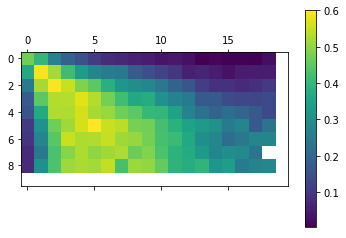

In [32]:
fig, ax = plt.subplots()
fig_mat = ax.matshow(np.array(success_matrix)/np.array(attempt_matrix))
plt.colorbar(fig_mat)

In [1025]:
l_counts

array([282, 243, 306, 179, 215, 274, 198, 187,  83,  33])

In [1026]:
r_counts

array([132, 116, 147, 105, 116, 147, 103, 142, 126,  93, 150, 114, 108,
        81,  72,  89,  64,  52,  34,   9])

In [1027]:
print(l_bins)
print(r_bins)

[ 1.   4.4  7.8 11.2 14.6 18.  21.4 24.8 28.2 31.6 35. ]
[ 1.   5.4  9.8 14.2 18.6 23.  27.4 31.8 36.2 40.6 45.  49.4 53.8 58.2
 62.6 67.  71.4 75.8 80.2 84.6 89. ]


In [953]:
success_matrix

[[157, 128, 23], [16, 2, 4], [1, 0, 0]]

In [954]:
np.sum(success_matrix)

331

In [955]:
success_matrix

[[157, 128, 23], [16, 2, 4], [1, 0, 0]]

In [956]:
attempt_matrix

[[393, 298, 136], [111, 7, 14], [39, 0, 0]]

In [100]:
a, b = []
print(a, b)

ValueError: not enough values to unpack (expected 2, got 0)

# 2d histogram approach to accuracy

In [3]:
def sample_tree_uniformly(my_tree):
    ###Get nodes to delete, sampling uniformly from 1 to n-1
    ln_to_remove = random.choice(list(range(0, len(my_tree.children[0].get_leaves()))))
    rn_to_remove = random.choice(list(range(0, len(my_tree.children[1].get_leaves()))))
    l_to_remove = random.sample(my_tree.children[0].get_leaves(), ln_to_remove)
    r_to_remove = random.sample(my_tree.children[1].get_leaves(), rn_to_remove)
    ###Actually remove said nodes
    for node in l_to_remove + r_to_remove:
        node.delete()
    return

def sample_tree_balanced(my_tree, downsample=False):
    l_leaves = len(my_tree.children[0].get_leaves())
    r_leaves = len(my_tree.children[1].get_leaves())
    l_to_remove, r_to_remove = [], []
    if l_leaves > r_leaves:
        if downsample:
            rn_to_remove = random.choice(list(range(0, len(my_tree.children[1].get_leaves()))))
            r_to_remove = random.sample(my_tree.children[1].get_leaves(), rn_to_remove)
            r_leaves = r_leaves-rn_to_remove
        ln_to_remove = l_leaves - r_leaves
        l_to_remove = random.sample(my_tree.children[0].get_leaves(), ln_to_remove)
    elif r_leaves > l_leaves:
        if downsample:
            ln_to_remove = random.choice(list(range(0, len(my_tree.children[0].get_leaves()))))
            l_to_remove = random.sample(my_tree.children[0].get_leaves(), ln_to_remove)
            l_leaves = l_leaves-ln_to_remove
        rn_to_remove = r_leaves - l_leaves
        r_to_remove = random.sample(my_tree.children[1].get_leaves(), rn_to_remove)
    else:
        pass
    for node in l_to_remove + r_to_remove:
        node.delete()
    return


In [38]:
lside_success = []
rside_success = []
lside_success_hard = []
rside_success_hard = []
lside_attempt = []
rside_attempt = []
for i in range(10000):
    ###Uniformly select a tree to use from this dataset
    true_tree_file = random.choice(glob.glob('../Data/OMA_orthologs/5204_4890/*.True.newick'))
    true_tree = ete3.Tree(true_tree_file, format=1)
    if true_tree.children[0].name != 'IntA_0':
        print('Orientation error on {}, exiting'.format(true_tree_file))
        break
    
    ###Reload that tree with a different var name
    test_tree = ete3.Tree(true_tree_file, format=1)
    if test_tree.children[0].name != 'IntA_0':
        print('Orientation error on {}, exiting'.format(true_tree_file))
        break
        
    ###Sampling function
    sample_tree_uniformly(test_tree)
#     sample_tree_balanced(test_tree)
#     sample_tree_balanced(test_tree, downsample=True)
    
    ###Possibly swap the topology so that it's consistent with the original tree
    if ('IntA' not in test_tree.children[0].name) and ('IntB' not in test_tree.children[1].name):
        test_tree.swap_children()
    
    ln_leaves = len(test_tree.children[0].get_leaves())
    rn_leaves = len(test_tree.children[1].get_leaves())    
    ####Don't bother moving forward with trees consisting of 2 leaves
    if ln_leaves + rn_leaves == 2:
        continue
    ####Something else strange may be happening if this is flagged
    if ('IntA' not in test_tree.children[0].name) and ('IntB' not in test_tree.children[1].name):
        print('Some strange problem with {}'.format(true_tree_file))
        continue
    assert test_tree.dist == 0.0
    
    #########################
    ###Perform a root here!
    #########################
#     R = test_tree.get_midpoint_outgroup()
#     test_tree.set_outgroup(R)
    rooting_methods_ete3.MP_root_ete3(test_tree)
    assert test_tree.dist == 0.0

    
    ###An easy test. Do the leaf sets match correctly on the new root?
    lside_true = set([i.name for i in true_tree.children[0].get_leaves()])
    rside_true = set([i.name for i in true_tree.children[1].get_leaves()])
    lside_test = set([i.name for i in test_tree.children[0].get_leaves()])
    rside_test = set([i.name for i in test_tree.children[1].get_leaves()])
    
    correct_leaves = False
    if len(lside_true.union(lside_test))-len(lside_true) == 0 and\
        len(rside_true.union(rside_test))-len(rside_true) == 0:
        correct_leaves = True
    elif len(lside_true.union(rside_test))-len(lside_true) == 0 and\
        len(rside_true.union(lside_test))-len(rside_true) == 0:
        test_tree.swap_children()
        correct_leaves = True
    
    if correct_leaves:
        lside_success.append(len(test_tree.children[0].get_leaves()))
        rside_success.append(len(test_tree.children[1].get_leaves()))
        ###A challenging task. Do the leaf sets match AND is the root distance in roughly
        ###the same location as it was before pruning
        first_leaf = test_tree.get_leaves()[0]
        true_dist_range = [true_tree.get_distance(first_leaf.name, true_tree.children[0]),\
                      true_tree.get_distance(first_leaf.name, true_tree.children[1])]
        assert true_dist_range[0] < true_dist_range[1]
        if (test_tree.get_distance(first_leaf) >= true_dist_range[0]) and\
            (test_tree.get_distance(first_leaf) <= true_dist_range[1]):
            #
            lside_success_hard.append(len(test_tree.children[0].get_leaves()))
            rside_success_hard.append(len(test_tree.children[1].get_leaves())) 
    
        
    lside_attempt.append(ln_leaves)
    rside_attempt.append(rn_leaves)


In [35]:
print('Overall accuracies amongst all tested:')
print(len(lside_success)/len(lside_attempt), len(lside_success_hard)/len(lside_attempt))

Overall accuracies amongst all tested:
0.3333333333333333 0.2652652652652653


/home/adhock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


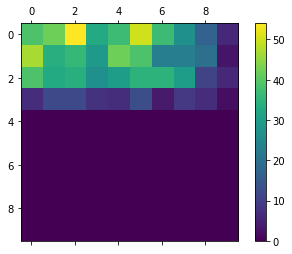

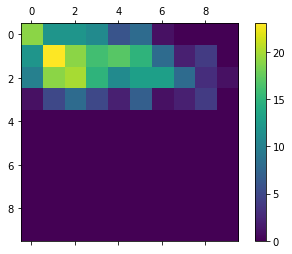

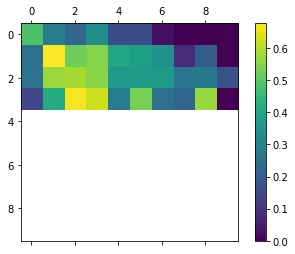

In [37]:
counts, bins = np.histogram(lside_attempt + rside_attempt, 10)
###
fig, ax = plt.subplots()
fig_mat = ax.matshow(np.histogram2d(lside_attempt, rside_attempt, bins=[bins, bins])[0])
plt.colorbar(fig_mat)
###
fig, ax = plt.subplots()
fig_mat = ax.matshow(np.histogram2d(lside_success, rside_success, bins=[bins, bins])[0])
plt.colorbar(fig_mat)
###
fig, ax = plt.subplots()
fig_mat = ax.matshow(np.histogram2d(lside_success, rside_success, bins=[bins, bins])[0]/
                    np.histogram2d(lside_attempt, rside_attempt, bins=[bins, bins])[0])
plt.colorbar(fig_mat)

In [12]:
bins

array([ 2.        ,  2.94117647,  3.88235294,  4.82352941,  5.76470588,
        6.70588235,  7.64705882,  8.58823529,  9.52941176, 10.47058824,
       11.41176471, 12.35294118, 13.29411765, 14.23529412, 15.17647059,
       16.11764706, 17.05882353, 18.        , 18.94117647, 19.88235294,
       20.82352941, 21.76470588, 22.70588235, 23.64705882, 24.58823529,
       25.52941176, 26.47058824, 27.41176471, 28.35294118, 29.29411765,
       30.23529412, 31.17647059, 32.11764706, 33.05882353, 34.        ])

Tree node '' (0x7f3fef7287f)